Load Verification files and examine the distribution of the spatial components
to aid fine-tuning of the colour levels for the maps.

In [8]:
import xarray as xr
import numpy as np

In [9]:
verif_file = "output/data/runs/b30a-0209f019/verif_aggregated.nc"

dat = xr.open_dataset(verif_file)

dat_var_metric = dat["PS.RMSE.spatial"]

dat_sel = dat_var_metric.sel(lead_time = "120h", init_hour = 0, season = "all")
dat_sel

<xarray.DataArray 'PS.RMSE.spatial' (eps: 1, values: 1147980)> Size: 5MB
[1147980 values with dtype=float32]
Coordinates:
  * eps        (eps) int64 8B 0
    lead_time  timedelta64[ns] 8B 5 days
    init_hour  int64 8B 0
    season     <U3 12B 'all'
    lon        (values) float64 9MB ...
    lat        (values) float64 9MB ...
    latitude   (values) float64 9MB ...
    longitude  (values) float64 9MB ...
Dimensions without coordinates: values

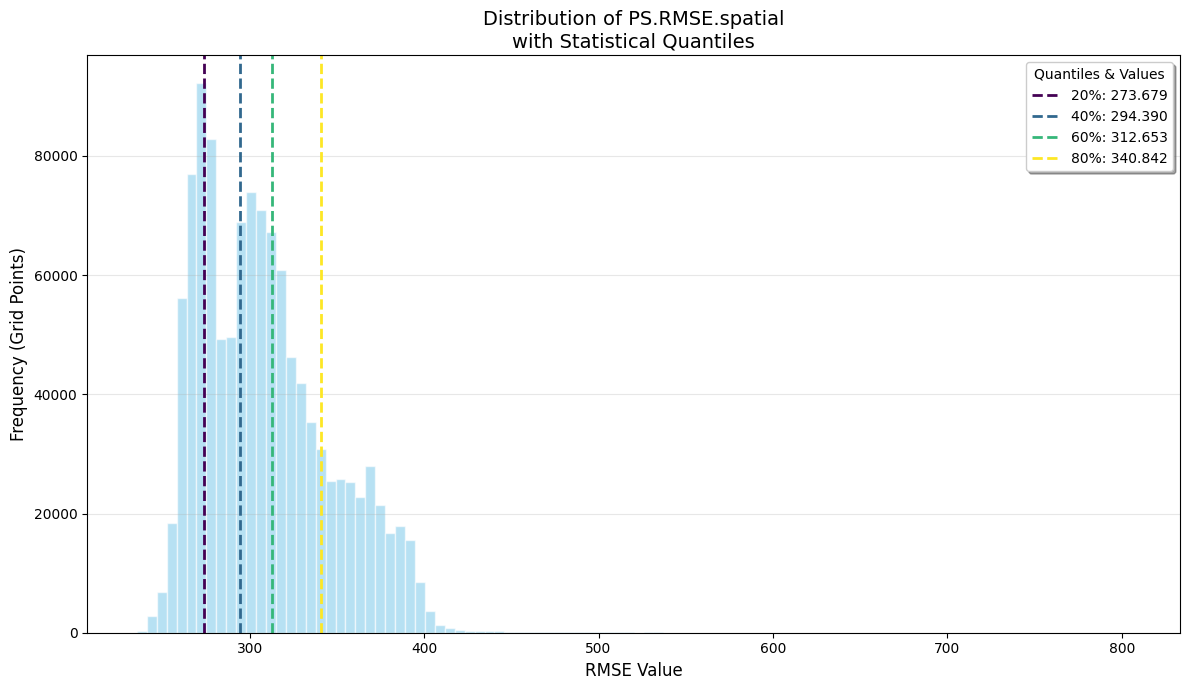

In [10]:
import matplotlib.pyplot as plt

# 1. Define and calculate the quantiles
q_list = [0.2, 0.4, 0.6, 0.8]
rmse_quantiles = dat_sel.quantile(q_list)

plt.figure(figsize=(12, 7))

# 2. Plot the histogram
# We set alpha=0.6 so the vertical lines are easier to see
dat_sel.plot.hist(bins=100, color='skyblue', edgecolor='white', alpha=0.6)

# 3. Add vertical lines for each quantile
# We'll use a colormap to give each line a different color
colors = plt.cm.viridis(np.linspace(0, 1, len(q_list)))

for q, val, color in zip(q_list, rmse_quantiles.values, colors):
    # Format the label for the legend: e.g., "50% (Median): 4.32"
    prob_label = f"{int(q*100)}%"
    if q == 0.5: prob_label += " (Median)"
    
    label_text = f"{prob_label}: {val:.3f}"
    
    plt.axvline(val, color=color, linestyle='--', linewidth=2, label=label_text)

# 4. Final plot styling
plt.title(f"Distribution of {dat_sel.name}\nwith Statistical Quantiles", fontsize=14)
plt.xlabel("RMSE Value", fontsize=12)
plt.ylabel("Frequency (Grid Points)", fontsize=12)

# Place the legend
plt.legend(title="Quantiles & Values", loc='upper right', frameon=True, shadow=True)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()